In [19]:
import matplotlib.pyplot as plt
from pandas import DataFrame, read_hdf, read_csv

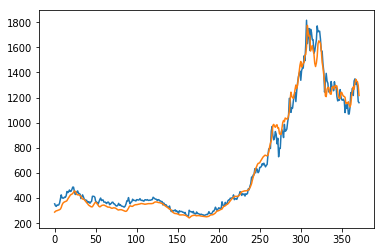

In [95]:
f = read_csv('forecast_Gold_Inflation.csv')
plt.plot(range(len(f.test_y)), f.test_y)
plt.plot(range(len(f.forecast)), f.forecast)
plt.show()

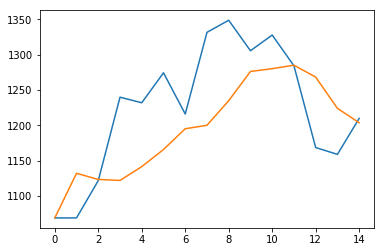

In [21]:
g = read_csv('forecast_Gold_Inflation')
plt.plot(range(len(g.test_y)), g.test_y)
plt.plot(range(len(g.forecast)), g.forecast)
plt.show()

In [37]:
h5 = DataFrame(read_hdf('DeepLearning.h5', 'Data_Gold'))
h5.head()

,Gold,DJI,InterestRate,Inflation,Reserves
DATE,,,,,
1985-02-01,304.80,1277.719971,8.50,106.3,37.251
1985-03-01,288.10,1299.359985,8.58,106.8,37.889
1985-04-01,324.65,1272.750000,8.27,107.0,37.661
1985-05-01,315.60,1242.050049,7.97,107.2,38.289
1985-06-01,313.15,1315.410034,7.53,107.5,39.386


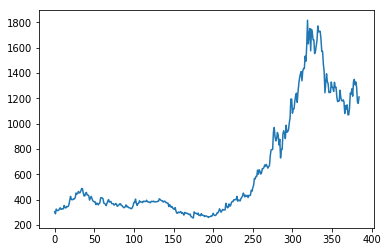

In [38]:
plt.plot(range(len(h5.Gold)), h5.Gold)
plt.show()

In [63]:
# Reshape date index and save it.

new_h5 = h5.reset_index().loc[:, ].rename(columns={'DATE': 'Date'})
new_h5.to_csv('Gold_data.csv', index=False)

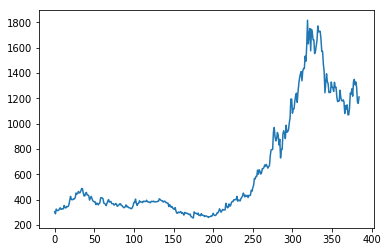

In [80]:
j = read_csv('Gold_data.csv')
plt.plot(range(len(j.Gold)),   j.Gold)
plt.show()

# Try the scaler

In [87]:
from sklearn.preprocessing import StandardScaler

def scale_data(data: DataFrame) -> (DataFrame, StandardScaler):
    df = data.copy()
    sc = StandardScaler()
    df.loc[:, 'Gold'] = sc.fit_transform(
        df.loc[:, 'Gold'].values.reshape(-1, 1))
    return df, sc

def scale_back(data, custom_scaler):
    df = data.copy()
    df.loc[:, 'Gold'] = custom_scaler.inverse_transform(
        df.loc[:, 'Gold'].values.reshape(-1, 1))
    return df

In [91]:
j = read_csv('Gold_data.csv')
j.head()

,Date,Gold,DJI,InterestRate,Inflation,Reserves
0,1985-02-01,304.80,1277.719971,8.50,106.3,37.251
1,1985-03-01,288.10,1299.359985,8.58,106.8,37.889
2,1985-04-01,324.65,1272.750000,8.27,107.0,37.661
3,1985-05-01,315.60,1242.050049,7.97,107.2,38.289
4,1985-06-01,313.15,1315.410034,7.53,107.5,39.386


In [92]:
j_scaled, scaler = scale_data(j)
j_scaled.head()

,Date,Gold,DJI,InterestRate,Inflation,Reserves
0,1985-02-01,-0.769515,1277.719971,8.50,106.3,37.251
1,1985-03-01,-0.808540,1299.359985,8.58,106.8,37.889
2,1985-04-01,-0.723128,1272.750000,8.27,107.0,37.661
3,1985-05-01,-0.744276,1242.050049,7.97,107.2,38.289
4,1985-06-01,-0.750002,1315.410034,7.53,107.5,39.386


In [93]:
j_rescaled = scale_back(j_scaled, scaler)
j_rescaled.head()

,Date,Gold,DJI,InterestRate,Inflation,Reserves
0,1985-02-01,304.80,1277.719971,8.50,106.3,37.251
1,1985-03-01,288.10,1299.359985,8.58,106.8,37.889
2,1985-04-01,324.65,1272.750000,8.27,107.0,37.661
3,1985-05-01,315.60,1242.050049,7.97,107.2,38.289
4,1985-06-01,313.15,1315.410034,7.53,107.5,39.386
